<a href="https://colab.research.google.com/github/HiveCase/MLT/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-7

Decision trees and KNN

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

## Decision Trees

**Decision stumps**

A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes. A decision stump partitions the dataset based on a single question: $f_k < \theta$. This is therefore the simplest decision tree that we can come up with.

---
Use the following decision stump for problems 1 and 3: The root has $1000$ data-points out of which $200$ belong to class-1. The left child-node has $100$ data-points out of which $50$ belong to class-1.

### Problem-1

Write a function `entropy` that accepts the proportion of points that belong to class-1 in a node as argument and returns the entropy. Use $\log_2$ for all computations.

Use this function to compute the entropy of the parent node.

In [3]:
### Solution ###
import numpy as np

def entropy(p):
    """
    Calculates the entropy of a node.

    Args:
        p (float): Proportion of points that belong to class-1 in the node.

    Returns:
        float: Entropy of the node.
    """
    if p == 0 or p == 1:
        return 0  # Entropy is 0 when the node is pure
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Compute the entropy of the parent node
p_parent = 200 / 1000
entropy_parent = entropy(p_parent)
print(f"Entropy of the parent node: {entropy_parent}")


Entropy of the parent node: 0.7219280948873623


### Problem-2

Plot the entropy of a node as a function of $p$, the proportion of data-points that belong to class $+1$.

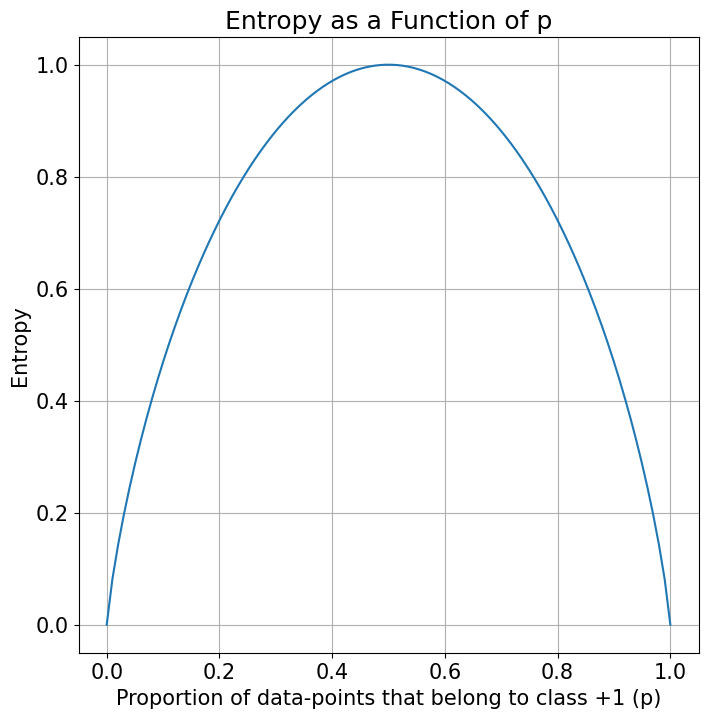

In [4]:
### Solution ###
import numpy as np
import matplotlib.pyplot as plt

def entropy(p):
    """
    Calculates the entropy of a node.

    Args:
        p (float): Proportion of points that belong to class-1 in the node.

    Returns:
        float: Entropy of the node.
    """
    if p == 0 or p == 1:
        return 0  # Entropy is 0 when the node is pure
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Generate a range of p values
p_values = np.linspace(0, 1, 100)

# Calculate entropy for each p value
entropy_values = [entropy(p) for p in p_values]

# Plot the entropy as a function of p
plt.plot(p_values, entropy_values)
plt.xlabel("Proportion of data-points that belong to class +1 (p)")
plt.ylabel("Entropy")
plt.title("Entropy as a Function of p")
plt.grid(True)
plt.show()


### Problem-3

Write a function `IG` that accepts the following arguments:

- `E`: entropy of the parent node `Q`
- `El`: entropy of the left child `L`
- `Er`: entropy of the right child `R`
- `gamma`: proportion of data-points in left child

Use this function to compute the information gain for the parent node.

In [5]:
### Solution ###
### Solution ###
def IG(E, El, Er, gamma):
    """
    Calculates the information gain.

    Args:
        E (float): Entropy of the parent node.
        El (float): Entropy of the left child node.
        Er (float): Entropy of the right child node.
        gamma (float): Proportion of data-points in the left child.

    Returns:
        float: Information gain.
    """
    return E - (gamma * El + (1 - gamma) * Er)

# Given values
E = entropy(200/1000) # Entropy of parent node
El = entropy(50/100)   # Entropy of left child node
Er = entropy((200-50)/(1000-100)) # Entropy of right child node
gamma = 100/1000      # Proportion of data-points in left child

# Compute the information gain
information_gain = IG(E, El, Er, gamma)
print(f"Information Gain: {information_gain}")


Information Gain: 0.03690791540384364


### Problem-4

Consider a decision stump with $1000$ data-points. Call the root node $Q$ and the left and right leaf nodes $L$ and $R$.

- The proportion of data-points that belong to class $+1$ in $Q$ is equal to $0.4$
- The proportion of points in the left node is equal to $0.7$, that is, $\gamma = 0.7$
-  $q$ is the proportion of data-points that belong to class $+1$ in $L$

What are the minimum ($q_{\min}$) and maximum ($q_{\max}$) values of $q$?

In [6]:
### Solution ###
### Solution ###
# Given:
# - Total data points = 1000
# - Proportion of +1 in Q = 0.4  => 400 +1 points in Q
# - Proportion of points in L = 0.7 => 700 points in L

# Let q_min be the minimum proportion of +1 in L
# To minimize +1 in L, maximize +1 in R

# Minimum: all +1 points are in R
# +1 points in R = 400
# Points in R = 300

# However, the number of +1 in L cannot be negative.

# so, the minimum +1 in L is zero.
# Then q_min = 0 / 700 = 0

# Maximum: all points in L are +1 or all the +1 points are in L
# The number of +1 point in L cannot be greater than the total +1 points in Q, which is 400
# The maximum +1 points in L is the min(700, 400) = 400
# Then q_max = 400 / 700 = 4/7
q_min = 0
q_max = 4/7

print(f"Minimum value of q (q_min): {q_min}")
print(f"Maximum value of q (q_max): {q_max}")


Minimum value of q (q_min): 0
Maximum value of q (q_max): 0.5714285714285714


### Problem-5

Using the above information, plot the information gain of the root as a function of $q$, where $q \in [q_{\min}, q_{\max}]$. Record at least two interesting observations.

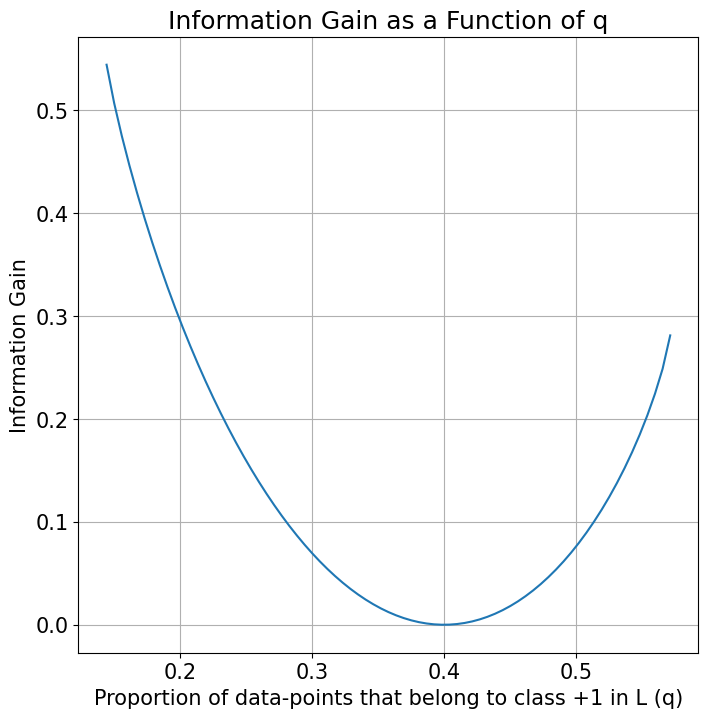

In [8]:
### Solution ###
import numpy as np
import matplotlib.pyplot as plt

def entropy(p):
    """Calculates the entropy of a node."""
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def IG(E, El, Er, gamma):
    """Calculates the information gain."""
    return E - (gamma * El + (1 - gamma) * Er)

# Given values
E = entropy(0.4)
gamma = 0.7
q_min = 0
q_max = 4/7

# Generate a range of q values
q_values = np.linspace(q_min, q_max, 100)

# Calculate information gain for each q value
ig_values = []
for q in q_values:
    El = entropy(q)
    # Calculate proportion of +1 in R
    plus_in_L = q * 700
    plus_in_R = 400 - plus_in_L
    Er = entropy(plus_in_R / 300)
    ig = IG(E, El, Er, gamma)
    ig_values.append(ig)

# Plot the information gain as a function of q
plt.plot(q_values, ig_values)
plt.xlabel("Proportion of data-points that belong to class +1 in L (q)")
plt.ylabel("Information Gain")
plt.title("Information Gain as a Function of q")
plt.grid(True)
plt.show()

# Observations:
# 1. The information gain is not always monotonically increasing or decreasing.
# 2. The information gain reaches a maximum value within the range of q.


### Problem-6

We will work with the dataset `X` for the next five problems. Visualize the data using a scatter plot. Color the points that belong to class $+1$ using "green" and those that belong to class $0$ using "red".

In [9]:
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

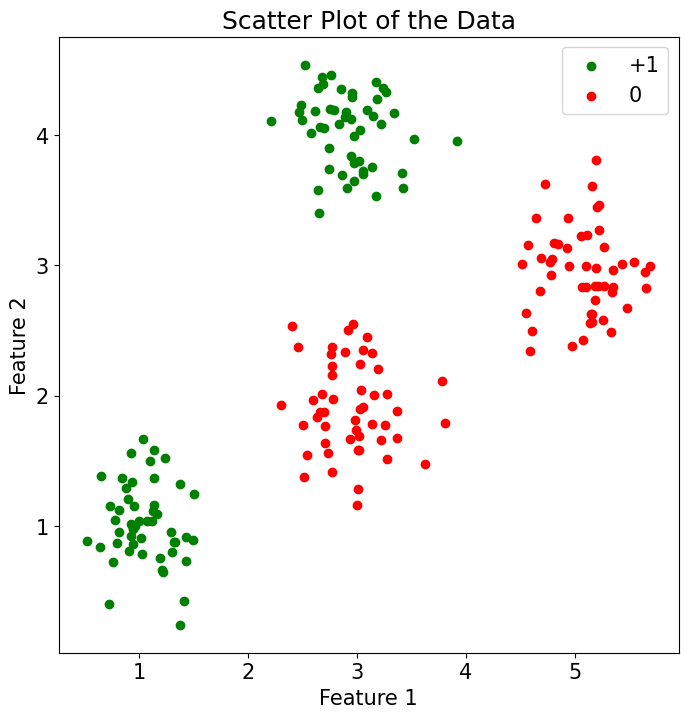

In [10]:
### Solution ###
import matplotlib.pyplot as plt

# Separate data points by class
X_pos = X[y == 1]
X_neg = X[y == 0]

# Create the scatter plot
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='green', label='+1')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red', label='0')

# Add labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of the Data")

# Add legend
plt.legend()

# Show the plot
plt.show()


### Problem-7

If you were to use a decision stump as a classifier:

- What is the best question $f_k < \theta$?
    - enter the feature index, $k$ (use zero-indexing)
    - enter the value of $\theta$
- What is the information gain for this question?

---

Write the function named `best_split` to solve this problem:

The function should accept the feature matrix `X` and the label vector `y` as arguements. It should return the tuple `(feat_best, value_best, ig_best)`.

In [ ]:
### Solution ###

### Problem-8

Grow a decision tree for this problem. You may have to use two programming concepts:

- recursion
- binary trees

Once you have grown the tree, answer the following questions:

- How many internal nodes does your tree have?
- How many leaf nodes does it have?

In [ ]:
### Solution ###

### Problem-9

Predict the label of the point $(3, 4)$.

In [ ]:
### Solution ###

### Problem-10

Plot the decision boundary.

In [ ]:
### Solution ###

## KNN


In [ ]:
### Data ###
### DO NOT EDIT THIS CELL ###
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X,
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)),
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))
### DO NOT EDIT THIS CELL ###

### Problem-11

Visualize the data using a scatter plot. Use red for class $0$ and green for class $1$.

In [ ]:
### Solution ###

### Problem-12

Write a function `predict` that accepts the following arguments:

- `X` - feature matrix
- `y` - label vector
- `x_test` - test data-point
- `k` - number of neighbors

The function should return the prediction for the point `x_test`. Use this function to compute the predicted label for the point $(-3, -2)$ with $k = 10$.

In [ ]:
### Solution ###

### Problem-13

Plot the decision boundary for different values of $k$:

- $k = 1$
- $k = 3$
- $k = 7$
- $k = 15$
- $k = 31$
- $k = 63$

Record at least two observations.

In [ ]:
### Solution ###